In [13]:
import pandas as pd
import sklearn
import seaborn as sns
import numpy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Informações sobre o Dataset:

### Idade: 

Importância: A idade é um fator crucial na previsão de doenças cardiovasculares, como o infarto, pois o risco aumenta com o envelhecimento. Pessoas mais velhas têm uma probabilidade maior de desenvolver problemas cardíacos.
Unidade de medida: Anos.

### Gênero:

Importância: O gênero também é um fator importante, pois existem diferenças biológicas entre homens e mulheres que podem afetar o risco de doenças cardíacas. Normalmente, os homens têm um risco maior.
Unidade de medida: Variável categórica (masculino = 1/feminino = 0).

### Batimentos por Minuto (BPM):

Importância: A frequência cardíaca indica como o coração está funcionando. Taxas elevadas ou baixas de batimentos por minuto podem indicar problemas no sistema cardiovascular.
Unidade de medida: Batimentos por minuto (bpm).

### Pressão Máxima (Sistólica):

Importância: A pressão arterial sistólica é uma medida da pressão nas artérias quando o coração está batendo. Valores elevados podem indicar hipertensão, um fator de risco para doenças cardíacas.
Unidade de medida: Milímetros de mercúrio (mmHg).

### Pressão Mínima (Diastólica):

Importância: A pressão arterial diastólica é a pressão nas artérias quando o coração está relaxado entre batimentos. Valores elevados podem indicar estresse nas artérias.
Unidade de medida: Milímetros de mercúrio (mmHg).

### Glicose:

Importância: Níveis elevados de glicose no sangue podem indicar resistência à insulina ou diabetes, fatores que aumentam o risco de doenças cardíacas.
Unidade de medida: Miligramas por decilitro (mg/dL).

### Ck-Mb:

Importância: A enzima CK-Mb é liberada quando há dano nas células musculares, incluindo as do coração. Níveis elevados podem indicar um possível ataque cardíaco.
Unidade de medida: Unidades por litro (ng/mL).

### Troponina:

Importância: A troponina é outra proteína liberada quando ocorre dano ao músculo cardíaco. Seus níveis elevados também podem indicar problemas cardíacos.
Unidade de medida: Nanogramas por mililitro (ng/mL).

In [14]:
Data = pd.read_csv("Heart Attack.csv")
print(Data)

      age  gender  impluse  pressurehight  pressurelow  glucose    kcm  \
0      64       1       66            160           83    160.0   1.80   
1      21       1       94             98           46    296.0   6.75   
2      55       1       64            160           77    270.0   1.99   
3      64       1       70            120           55    270.0  13.87   
4      55       1       64            112           65    300.0   1.08   
...   ...     ...      ...            ...          ...      ...    ...   
1314   44       1       94            122           67    204.0   1.63   
1315   66       1       84            125           55    149.0   1.33   
1316   45       1       85            168          104     96.0   1.24   
1317   54       1       58            117           68    443.0   5.80   
1318   51       1       94            157           79    134.0  50.89   

      troponin     class  
0        0.012  negative  
1        1.060  positive  
2        0.003  negative  
3  

In [15]:
Data.columns = ["Idade","Gênero","Impulso","Pressão Mâxima","Pressão Mínima","Glicose","CK-MB","Troponina","Infarto"]
print(Data)

      Idade  Gênero  Impulso  Pressão Mâxima  Pressão Mínima  Glicose  CK-MB  \
0        64       1       66             160              83    160.0   1.80   
1        21       1       94              98              46    296.0   6.75   
2        55       1       64             160              77    270.0   1.99   
3        64       1       70             120              55    270.0  13.87   
4        55       1       64             112              65    300.0   1.08   
...     ...     ...      ...             ...             ...      ...    ...   
1314     44       1       94             122              67    204.0   1.63   
1315     66       1       84             125              55    149.0   1.33   
1316     45       1       85             168             104     96.0   1.24   
1317     54       1       58             117              68    443.0   5.80   
1318     51       1       94             157              79    134.0  50.89   

      Troponina   Infarto  
0         0

In [16]:
Criterio_1 = Data["Infarto"] == "negative"
Criterio_2 = Data["Infarto"] == "positive"
Target = Data["Infarto"] 
Negativos= Target.loc[Criterio_1]
Positivos= Target.loc[Criterio_2]
Linhas_1=Negativos.index
Linhas_2=Positivos.index
Data.loc[Linhas_1,"Infarto"] = 0
Data.loc[Linhas_2,"Infarto"] = 1
print(Data)

      Idade  Gênero  Impulso  Pressão Mâxima  Pressão Mínima  Glicose  CK-MB  \
0        64       1       66             160              83    160.0   1.80   
1        21       1       94              98              46    296.0   6.75   
2        55       1       64             160              77    270.0   1.99   
3        64       1       70             120              55    270.0  13.87   
4        55       1       64             112              65    300.0   1.08   
...     ...     ...      ...             ...             ...      ...    ...   
1314     44       1       94             122              67    204.0   1.63   
1315     66       1       84             125              55    149.0   1.33   
1316     45       1       85             168             104     96.0   1.24   
1317     54       1       58             117              68    443.0   5.80   
1318     51       1       94             157              79    134.0  50.89   

      Troponina Infarto  
0         0.0

In [17]:
Data.insert(1,'Homem',0)
Data.insert(1,'Mulher',0)
Criterio_3 = Data["Gênero"] == 0
Criterio_4 = Data["Gênero"] == 1
Target = Data["Infarto"] 
Mulher= Target.loc[Criterio_3]
Homem= Target.loc[Criterio_4]
Linhas_3=Mulher.index
Linhas_4=Homem.index
Data.loc[Linhas_3,"Mulher"] = 1
Data.loc[Linhas_4,"Homem"] = 1
Data = Data.drop("Gênero",axis=1)
print(Data)

      Idade  Mulher  Homem  Impulso  Pressão Mâxima  Pressão Mínima  Glicose  \
0        64       0      1       66             160              83    160.0   
1        21       0      1       94              98              46    296.0   
2        55       0      1       64             160              77    270.0   
3        64       0      1       70             120              55    270.0   
4        55       0      1       64             112              65    300.0   
...     ...     ...    ...      ...             ...             ...      ...   
1314     44       0      1       94             122              67    204.0   
1315     66       0      1       84             125              55    149.0   
1316     45       0      1       85             168             104     96.0   
1317     54       0      1       58             117              68    443.0   
1318     51       0      1       94             157              79    134.0   

      CK-MB  Troponina Infarto  
0     

In [18]:
Data = Data.astype({"Homem": bool,"Mulher": bool, "Infarto": bool})
Data.describe()

,Idade,Impulso,Pressão Mâxima,Pressão Mínima,Glicose,CK-MB,Troponina
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [19]:
Data.describe(include=[bool])

,Mulher,Homem,Infarto
count,1319,1319,1319
unique,2,2,2
top,False,True,True
freq,870,870,810


A partir de todos esses dados e analizes seria possivel treinar uma IA para que ela pudesse a partir dos dados dizer se a pessoa teve ou não um infarto o que poderia ser util em hospitais por exemplo pra que apois os exame entrarem no sistema poder alertar o médico da urgencia para que ele possa analizar o caso.

In [20]:
Indices_Treino, Indices_Teste = train_test_split(Data.index, test_size=0.2)
Data_Treino = Data.loc[Indices_Treino]
Data_Teste = Data.loc[Indices_Teste]

In [21]:
Xtr=Data_Treino.drop("Infarto", axis=1)
Ytr=Data_Treino["Infarto"]
print(Xtr,Ytr)
Xts=Data_Teste.drop("Infarto", axis=1)
Yts=Data_Teste["Infarto"]
print(Xts,Yts)

      Idade  Mulher  Homem  Impulso  Pressão Mâxima  Pressão Mínima  Glicose  \
1121     63   False   True       82             164              90     95.0   
259      44   False   True       71             143              71    104.0   
1029     61   False   True       90             150              84    159.0   
80       53   False   True       80             118              64    147.0   
459      65    True  False      125              92              60    136.0   
...     ...     ...    ...      ...             ...             ...      ...   
412      65   False   True       63             150              95    122.0   
945      46   False   True       96              97              55    134.0   
639      58   False   True       64             160              77    328.0   
703      48    True  False       82             125              61    125.0   
882      60   False   True       72             113              64    161.0   

      CK-MB  Troponina  
1121   2.60   

In [22]:
TESTE = RandomForestClassifier()
TESTE.fit(Xtr,Ytr)

RandomForestClassifier()

<AxesSubplot: >

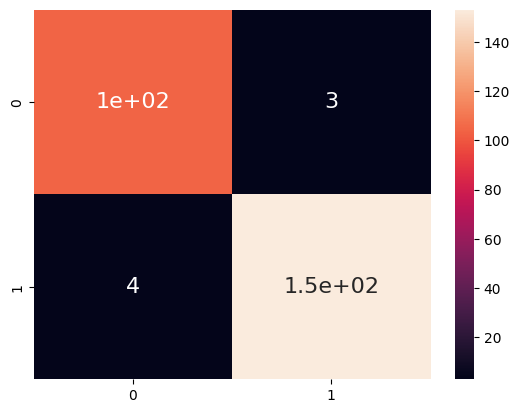

In [23]:
Y_Previsto = TESTE.predict(Xts)

Matriz_Conf = confusion_matrix(Yts,Y_Previsto)

Data_conf = pd.DataFrame(Matriz_Conf)

sns.heatmap(Data_conf, annot=True, annot_kws={"size": 16})

## Referencias:

Notebook de Módulo Pandas

1.Banco de dados da onde o Dataset foi tirado: https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset

2.Explicação sobre a funão loc do pandas: https://medium.com/horadecodar/data-science-tips-02-como-usar-loc-e-iloc-no-pandas-fab58e214d87

3.Explicação do que é CK_MB: https://ibapcursos.com.br/creatina-quinase-ckmb-alta-no-sangue-o-que-significa-essa-alteracao-no-exame/   e  https://labtestsonline.org.br/tests/ck-mb

4.Explicação do que é troponina: https://www.tuasaude.com/exame-de-troponina/

5.Explicação de como modificar o tipo de uma coluna: https://jobu.com.br/2022/11/29/3-metodos-de-como-alterar-tipo-da-coluna-com-pandas/

6.Ajudou na eXplicação das colunas: https://cardiopapers.com.br/por-que-nao-existe-aumento-falso-positivo-de-troponina/
7.https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier